In [163]:
import tensorflow as tf

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import csv
import networkx as nx
from subprocess import check_output
#from wordcloud import WordCloud, STOPWORDS
import tensorflow as tf
from IPython.display import YouTubeVideo
plt.style.use('ggplot')

# Replace 'tfrecord_directory' with the path to your directory containing TFRecord files
tfrecord_directory = "data/Youtube8MData/dummytrain/*.tfrecord"

In [164]:
vid_ids = []
labels = []

# Define the function to parse a single TFRecord example
def parse_tfrecord_fn(example):
    feature_description = {
        'id': tf.io.FixedLenFeature([], tf.string),
        'labels': tf.io.VarLenFeature(tf.int64),
        # Add other features as needed
    }
    example = tf.io.parse_single_example(example, feature_description)

    def decode_id(tensor):
        return tensor.numpy().decode('UTF-8')

    def decode_labels(tensor):
        return tf.sparse.to_dense(tensor, default_value=0).numpy().tolist()

    vid_id = tf.py_function(func=decode_id, inp=[example['id']], Tout=tf.string)
    label = tf.py_function(func=decode_labels, inp=[example['labels']], Tout=tf.int64)

    return vid_id, label

# Get a list of TFRecord files in the directory
tfrecord_files = tf.io.gfile.glob(tfrecord_directory)

# Iterate over TFRecord files
for file_path in tfrecord_files:
    # Create a TFRecordDataset
    dataset = tf.data.TFRecordDataset(file_path)

    # Map the parse function to each element in the dataset
    parsed_dataset = dataset.map(parse_tfrecord_fn)

    # Iterate over the parsed dataset and extract ids and labels
    for vid_id, label in parsed_dataset:
        vid_ids.append(vid_id.numpy().decode('UTF-8'))
        labels.append(label.numpy())


In [166]:
vid_ids

['lKbF',
 'HebF',
 'GkbF',
 'q2bF',
 'aUbF',
 'A9bF',
 '52bF',
 'gNbF',
 '6ZbF',
 'rubF',
 'UqbF',
 'ATbF',
 '3lbF',
 'UGbF',
 'oJbF',
 'exbF',
 'CFbF',
 'CsbF',
 'pUbF',
 'DLbF',
 '24bF',
 'abbF',
 'sEbF',
 'gZbF',
 'osbF',
 'AZbF',
 'qhbF',
 'q9bF',
 'YpbF',
 '9rbF',
 'p8bF',
 'yBbF',
 'gkbF',
 'bHbF',
 'kobF',
 '2jbF',
 'XdbF',
 'HcbF',
 'vCbF',
 'WmbF',
 'X8bF',
 'qjbF',
 'gYbF',
 'UbbF',
 '4rbF',
 'GfbF',
 'ztbF',
 't7bF',
 'BybF',
 'a0bF',
 'XzbF',
 '6mbF',
 'LPbF',
 'NgbF',
 'dnbF',
 'TTbF',
 'iBbF',
 'BkbF',
 'sIbF',
 'YUbF',
 'xmbF',
 'wNbF',
 'GgbF',
 '7ybF',
 'LFbF',
 'zsbF',
 'mxbF',
 'gnbF',
 'W0bF',
 'aibF',
 'SWbF',
 'eQbF',
 'VYbF',
 'LibF',
 'MRbF',
 'kpbF',
 'LCbF',
 'XibF',
 'PnbF',
 'u8bF',
 'g0bF',
 'DpbF',
 'PvbF',
 'ubbF',
 '6UbF',
 'jabF',
 'NIbF',
 'UvbF',
 'jgbF',
 'MGbF',
 'mcbF',
 'EQbF',
 'ijbF',
 'zIbF',
 '8wbF',
 'L5bF',
 '2ObF',
 'xYbF',
 'FAbF',
 'lSbF',
 'ABbF',
 'NzbF',
 'dPbF',
 'vybF',
 'dDbF',
 'z1bF',
 'upbF',
 'SqbF',
 'ilbF',
 'D1bF',
 'wkbF',
 

In [88]:
print('Number of videos in this tfrecord: ',len(vid_ids))
print('Number of labels in this tfrecord: ', len (labels))
print('Picking a youtube video id:',vid_ids[26])

Number of videos in this tfrecord:  41393
Number of labels in this tfrecord:  41393
Picking a youtube video id: aeCj


In [55]:
sub = pd.read_csv('data/sample_submission.csv')
sub.head()

,Class,Segments
0,3,002G:35 002G:40 002G:60
1,7,002G:35 002G:40 002G:60
2,8,002G:35 002G:40 002G:60
3,11,002G:35 002G:40 002G:60
4,12,002G:35 002G:40 002G:60


In [125]:
import requests
import re

# Replace 'exbF' with your actual vid_id
vid_id = vid_ids[6]

# Extract the first two characters of vid_id
prefix = vid_id[:2]

url = f'http://data.yt8m.org/2/j/i/{prefix}/{vid_id}.js'

# Send a GET request to the URL
response = requests.get(url)


# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Use regular expressions to extract both video IDs
    matches = re.findall(r'"([^"]+)"', response.text)
    if len(matches) >= 2:
        # Extract the second video ID
        video_id = matches[1]
        # Display the YouTube video
        YouTubeVideo(video_id)
    else:
        print("Two video IDs not found in the response.")
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

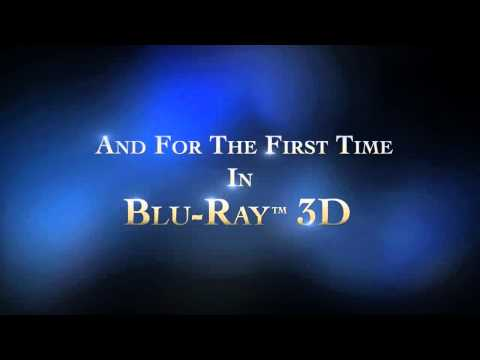

In [36]:
from IPython.display import YouTubeVideo

# With that video id, we can play the video
YouTubeVideo(video_id)

In [6]:
feat_rgb = []
feat_audio = []

# Define the function to parse a single TFRecord example
def parse_tfrecord_fn(example):
    feature_description = {
        'rgb': tf.io.VarLenFeature(tf.string),
        'audio': tf.io.VarLenFeature(tf.string),
        # Add other features as needed
    }
    example = tf.io.parse_single_example(example, feature_description)

    def decode_frame(frame):
        return tf.cast(tf.raw_ops.DecodeRaw(contents=frame, out_type=tf.uint8), tf.float32)

    # Check if 'rgb' is sparse and handle accordingly
    rgb_frames = [decode_frame(frame) for frame in tf.sparse.to_dense(example['rgb']).values]
    audio_frames = [decode_frame(frame) for frame in tf.sparse.to_dense(example['audio']).values]

    return rgb_frames, audio_frames

# Get a list of TFRecord files in the directory
tfrecord_files = tf.io.gfile.glob(tfrecord_directory)

# Iterate over TFRecord files
for file_path in tfrecord_files:
    # Create a TFRecordDataset
    dataset = tf.data.TFRecordDataset(file_path)

    # Map the parse function to each element in the dataset
    parsed_dataset = dataset.map(parse_tfrecord_fn)

    # Iterate over the parsed dataset (just taking the first video for demonstration)
    for rgb_frames, audio_frames in parsed_dataset.take(1):
        feat_rgb.append(rgb_frames)
        feat_audio.append(audio_frames)

AttributeError: in user code:

    File "/var/folders/z8/rgrsq0rj7pn9t8wrj4ydd0vw0000gn/T/ipykernel_68308/3390901517.py", line 17, in parse_tfrecord_fn  *
        rgb_frames = [decode_frame(frame) for frame in tf.sparse.to_dense(example['rgb']).values]

    AttributeError: 'SymbolicTensor' object has no attribute 'values'


In [47]:
import pandas as pd

vocabulary = pd.read_csv('data/vocabulary.csv')
vocabulary.head()

,Index,TrainVideoCount,KnowledgeGraphId,Name,WikiUrl,Vertical1,Vertical2,Vertical3,WikiDescription
0,3,378135,/m/01jddz,Concert,https://en.wikipedia.org/wiki/Concert,Arts & Entertainment,NaN,NaN,A concert is a live music performance in front...
1,7,200813,/m/0k4j,Car,https://en.wikipedia.org/wiki/Car,Autos & Vehicles,NaN,NaN,"A car is a wheeled, self-powered motor vehicle..."
2,8,181579,/m/026bk,Dance,https://en.wikipedia.org/wiki/Dance,Arts & Entertainment,NaN,NaN,Dance is a performance art form consisting of ...
3,11,135357,/m/02wbm,Food,https://en.wikipedia.org/wiki/Food,Food & Drink,NaN,NaN,Food is any substance consumed to provide nutr...
4,12,130835,/m/02vx4,Association football,https://en.wikipedia.org/wiki/Association_foot...,Sports,NaN,NaN,"Association football, more commonly known as f..."


In [48]:
vocabulary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Index             1000 non-null   int64 
 1   TrainVideoCount   1000 non-null   int64 
 2   KnowledgeGraphId  1000 non-null   object
 3   Name              988 non-null    object
 4   WikiUrl           988 non-null    object
 5   Vertical1         1000 non-null   object
 6   Vertical2         153 non-null    object
 7   Vertical3         12 non-null     object
 8   WikiDescription   988 non-null    object
dtypes: int64(2), object(7)
memory usage: 70.4+ KB


In [49]:
from collections import Counter

label_mapping =  vocabulary[['Index', 'Name']].set_index('Index', drop=True).to_dict()['Name']
print("we have {} unique labels in the dataset".format(len(vocabulary['Index'].unique())))

we have 1000 unique labels in the dataset


In [89]:
# Specify the value of N for top N most common labels
top_n = 10

# Use Counter to count occurrences of each label
label_counts = Counter(labels)

# Get the top N most common labels
top_n_labels = label_counts.most_common(top_n)

# Extract the labels and their counts
top_labels, top_counts = zip(*top_n_labels)
#top_lab = [vocabulary[i] for i in top_labels]
print("Top", top_n, "labels:", top_labels )
print("Counts:", top_counts)

Top 10 labels: (0, 2, 3, 5, 11, 4, 8, 15, 14, 6)
Counts: (8453, 4410, 3967, 1823, 1460, 1300, 1126, 1078, 970, 884)


In [103]:
# Create a DataFrame for top_labels and their counts
top_labels_data = {
    'label': list(top_labels),
    'count': list(top_counts)
}
top_labels_df = pd.DataFrame(top_labels_data)

vocabulary['labelindex'] = vocabulary.index

# Merge the DataFrames on the 'label' column
result_df = pd.merge(top_labels_df, vocabulary, left_on="label", right_on="labelindex")

# Sort the DataFrame by count in descending order
result_df = result_df.sort_values(by="count", ascending=False)

# Select only the 'Name' and 'count' columns from the result DataFrame
result_df = result_df[['Name', 'count']]

# Display the top 10 results
result_df.head(10)

,Name,count
0,Concert,8453
1,Dance,4410
2,Food,3967
3,Motorsport,1823
4,Drum kit,1460
5,Association football,1300
6,Mobile phone,1126
7,Drum,1078
8,Dish (food),970
9,Pet,884


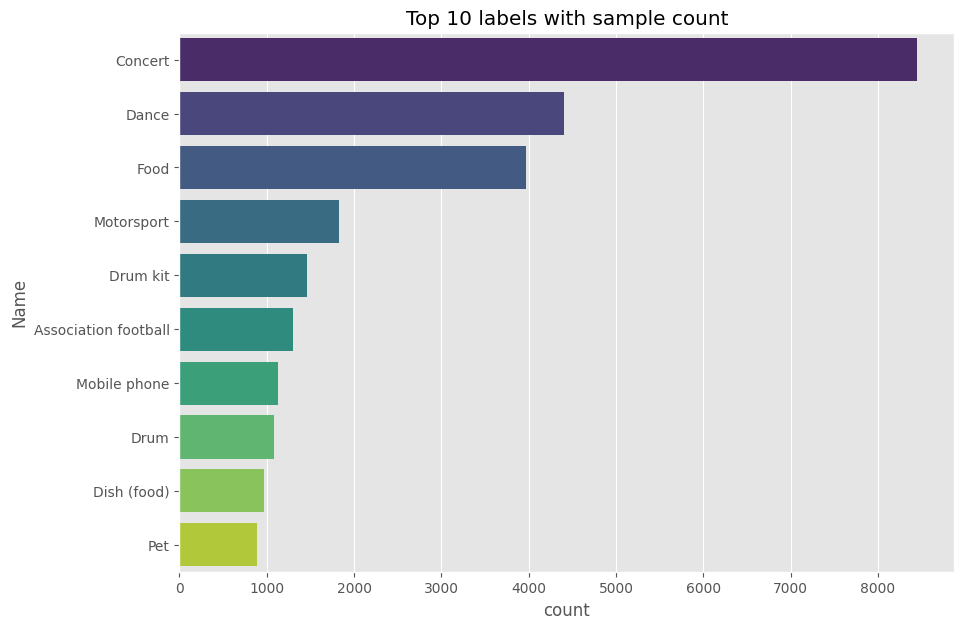

In [110]:
# Select the top 10 rows
top_n_result = result_df.head(10)

# Choose a Seaborn color palette
color_palette = "viridis"

# Create a barplot using Seaborn
plt.figure(figsize=(10, 7))
sns.barplot(x='count', y='Name', data=top_n_result, palette=color_palette, hue='Name')
plt.title('Top 10 labels with sample count')
plt.savefig('top10.png', dpi=300, bbox_inches='tight')
plt.show()

In [97]:
subset = vocabulary.iloc[top_labels]

In [98]:
subset

0                  Concert
2                    Dance
3                     Food
5               Motorsport
11                Drum kit
4     Association football
8             Mobile phone
15                    Drum
14             Dish (food)
6                      Pet
Name: Name, dtype: object

In [46]:
import csv

with open('data/segment_vocabulary.csv', 'r') as f:
  vocabularylist = list(csv.reader(f))

T1=[]

for l in vocabularylist:
    print(l)
    if l[5] != 'NaN' and l[6] !='NaN' and l[5] != '' and l[6] !='' and l[5] !=  l[6] :
        c1 = l[5]
        c2 = l[6]
        tuple = (c1, c2)
    if l[5] != 'NaN' and l[7] !='NaN' and l[5] != '' and l[7] !='' and l[5] !=  l[7] :
        c1 = l[5]
        c2 = l[7]
        tuple = (c1, c2)
    if l[6] != 'NaN' and l[7] !='NaN' and l[6] != '' and l[7] !='' and l[7] !=  l[6] :
        c1 = l[6]
        c2 = l[7]
        tuple = (c1, c2)
    T1.append(tuple)
    
edges = {k: T1.count(k) for k in set(T1)}
print ("List = ",len(edges), "elements")
edges

['Index', 'KnowledgeGraphId', 'Name', 'PositiveSegmentCount', 'TotalSegmentCount']


IndexError: list index out of range

In [119]:
video_id

'9--MiE_Hd8Y'

In [127]:
import ipywidgets as widgets
from IPython.display import display, HTML
import json
import time

# Function to update the output based on timestamps and outputs
def update_output(change):
    current_time = change.new
    index = 0
    while index < len(timestamps) and current_time > timestamps[index]:
        index += 1
    if index > 0:
        output.value = outputs[index - 1]

# Create an HTML widget to embed the YouTube video

video_html = f'<iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}" frameborder="0" allowfullscreen></iframe>'
video_widget = widgets.HTML(value=video_html)

# JSON data with timestamps and outputs
json_data = '{"timestamps": [0, 3, 5, 7], "outputs": ["A", "B", "C", "D"]}'
data = json.loads(json_data)
timestamps = data['timestamps']
outputs = data['outputs']

# Create an IntSlider for controlling the video time
time_slider = widgets.IntSlider(min=0, max=max(timestamps), step=1, description='Time (s)')

# Attach the update_output function to the time_slider's value change
time_slider.observe(update_output, names='value')

# Create an HTML widget to display the dynamic output
output = widgets.HTML(value='')

# Display the widgets
display(widgets.VBox([video_widget, time_slider, output]))


In [126]:
video_id

'9--MiE_Hd8Y'

In [134]:
video_id='9--MiE_Hd8Y'

In [160]:
import ipywidgets as widgets
from IPython.display import YouTubeVideo, display, clear_output
import time

# Your YouTube video ID
video_id = '9--MiE_Hd8Y'

# Create an HTML widget to embed the YouTube video
video_html = f'<iframe width="560" height="315" src="https://www.youtube.com/embed/{video_id}" frameborder="0" allowfullscreen></iframe>'
video_widget = widgets.HTML(value=video_html)

# List of items to display on the timeline
list_items = ["A", "B", "C", "D"]

# Get the total duration of the YouTube video (you can fetch this dynamically using the YouTube API)
total_duration = 10 #YouTubeVideo(video_id).duration

# Calculate the timestamp intervals
timestamp_intervals = [i * (total_duration // len(list_items)) for i in range(len(list_items) + 1)]

# Create an HTML widget for displaying list items
output_widget = widgets.HTML(value="")

# Display the widgets
display(video_widget)
display(output_widget)

# Display list items at the corresponding timestamps
for i, timestamp in enumerate(timestamp_intervals[:-1]):
    clear_output(wait=True)
    output_widget.value = f"Time: {timestamp} seconds - {list_items[i]}"
    time.sleep(timestamp_intervals[i + 1] - timestamp)

# Clear the final output
clear_output(wait=True)

HTML(value='<iframe width="560" height="315" src="https://www.youtube.com/embed/9--MiE_Hd8Y" frameborder="0" a…

HTML(value='')

In [158]:
from IPython.display import HTML, display, Javascript
import time

# Your YouTube video ID
video_id = '9--MiE_Hd8Y'

# Create HTML for the YouTube video player
video_html = f'<iframe id="ytplayer" type="text/html" width="640" height="360" src="https://www.youtube.com/embed/{video_id}?enablejsapi=1" frameborder="0" allowfullscreen></iframe>'
display(HTML(video_html))

# List of items to display on the timeline
list_items = ["A", "B", "C", "D"]

# Calculate the timestamp intervals
total_duration = 100  # Replace this with the actual duration of the video
timestamp_intervals = [i * (total_duration // len(list_items)) for i in range(len(list_items) + 1)]

# Pass the list of items from Python to JavaScript
display(Javascript(f"var listItems = {list_items};"))

# Create HTML for displaying list items
output_html = '<div id="output" style="font-size: 24px; padding: 20px;"></div>'
display(HTML(output_html))

# JavaScript code to synchronize time slider with YouTube video
js_code = """
var player;
function onYouTubePlayerAPIReady() {
    player = new YT.Player('ytplayer', {
        events: {
            'onStateChange': function(event) {
                if (event.data == YT.PlayerState.PLAYING) {
                    setInterval(updateTime, 1000);
                }
            }
        }
    });
}

function updateTime() {
    var time = player.getCurrentTime();
    var output = document.getElementById('output');
    output.innerHTML = getOutput(Math.floor(time));
}

function getOutput(time) {
    var index = 0;
    while (index < listItems.length) {
        if (time > timestamp_intervals[index]) {
            index += 1;
        } else {
            break;
        }
    }
    if (index > 0) {
        return listItems[index - 1];
    }
    return '';
}
"""
# Display the JavaScript code
display(Javascript(js_code))


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>